In [54]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks, regularizers
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from collections import deque

In [ ]:
TRAIN_DIR = r"C:\Users\Krish\Desktop\BU\Sign Language Recoginastion\Dataset\asl_alphabet_train\asl_alphabet_train"
TEST_DIR = r"C:\Users\Krish\Desktop\BU\Sign Language Recoginastion\Dataset\asl_alphabet_test\test"

IMG_SIZE   = 64
BATCH_SIZE = 32

In [56]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=(0.8, 1.2),
    validation_split=0.2   
)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

labels = {v:k for k,v in train_generator.class_indices.items()}
print("Labels:", labels)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Labels: {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}


In [ ]:
model = models.Sequential([
  
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

   
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

c:\Users\Krish\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 9,555,037 (36.45 MB)

 Trainable params: 9,552,221 (36.44 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [58]:
from tensorflow.keras.models import load_model

model = load_model("SLR_final.h5")

print("Model loaded successfully!")

Model loaded successfully!


In [ ]:

cb = [
    callbacks.ModelCheckpoint("SLR_final.h5", save_best_only=True, monitor='val_accuracy', mode='max'),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3),
    callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=cb
)

print("Training finished. Best model saved as SLR_final.h5")

c:\Users\Krish\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.4547 - loss: 3.3701

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 1255s 576ms/step - accuracy: 0.6770 - loss: 2.3662 - val_accuracy: 0.7564 - val_loss: 1.8599 - learning_rate: 0.0010
Epoch 2/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.9082 - loss: 1.3969

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 575s 264ms/step - accuracy: 0.9190 - loss: 1.3734 - val_accuracy: 0.8439 - val_loss: 1.6722 - learning_rate: 0.0010
Epoch 3/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 560s 258ms/step - accuracy: 0.9422 - loss: 1.3312 - val_accuracy: 0.8364 - val_loss: 1.7155 - learning_rate: 0.0010
Epoch 4/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.9491 - loss: 1.2790

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 563s 259ms/step - accuracy: 0.9524 - loss: 1.2529 - val_accuracy: 0.9039 - val_loss: 1.4066 - learning_rate: 0.0010
Epoch 5/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 575s 264ms/step - accuracy: 0.9613 - loss: 1.1667 - val_accuracy: 0.8133 - val_loss: 1.7419 - learning_rate: 0.0010
Epoch 6/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 617s 284ms/step - accuracy: 0.9677 - loss: 1.0728 - val_accuracy: 0.7978 - val_loss: 1.7075 - learning_rate: 0.0010
Epoch 7/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 621s 286ms/step - accuracy: 0.9712 - loss: 1.0061 - val_accuracy: 0.8948 - val_loss: 1.2984 - learning_rate: 0.0010
Epoch 8/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.9721 - loss: 0.9675

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 628s 289ms/step - accuracy: 0.9733 - loss: 0.9487 - val_accuracy: 0.9164 - val_loss: 1.1639 - learning_rate: 0.0010
Epoch 9/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 630s 290ms/step - accuracy: 0.9770 - loss: 0.8890 - val_accuracy: 0.9157 - val_loss: 1.1719 - learning_rate: 0.0010
Epoch 10/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.9773 - loss: 0.8617

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 628s 289ms/step - accuracy: 0.9776 - loss: 0.8654 - val_accuracy: 0.9197 - val_loss: 1.0889 - learning_rate: 0.0010
Epoch 11/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.9800 - loss: 0.8218

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 615s 283ms/step - accuracy: 0.9794 - loss: 0.8191 - val_accuracy: 0.9207 - val_loss: 1.1402 - learning_rate: 0.0010
Epoch 12/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 610s 280ms/step - accuracy: 0.9811 - loss: 0.7659 - val_accuracy: 0.8533 - val_loss: 1.2874 - learning_rate: 0.0010
Epoch 13/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.9804 - loss: 0.7950

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 599s 276ms/step - accuracy: 0.9813 - loss: 0.7601 - val_accuracy: 0.9282 - val_loss: 0.9068 - learning_rate: 0.0010
Epoch 14/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.9798 - loss: 0.7618

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 614s 282ms/step - accuracy: 0.9817 - loss: 0.7316 - val_accuracy: 0.9322 - val_loss: 0.9291 - learning_rate: 0.0010
Epoch 15/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9844 - loss: 0.6858

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 608s 280ms/step - accuracy: 0.9836 - loss: 0.6884 - val_accuracy: 0.9414 - val_loss: 0.7887 - learning_rate: 0.0010
Epoch 16/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 608s 280ms/step - accuracy: 0.9846 - loss: 0.6471 - val_accuracy: 0.9241 - val_loss: 0.8864 - learning_rate: 0.0010
Epoch 17/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 611s 281ms/step - accuracy: 0.9848 - loss: 0.6312 - val_accuracy: 0.9371 - val_loss: 0.7687 - learning_rate: 0.0010
Epoch 18/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 621s 285ms/step - accuracy: 0.9850 - loss: 0.6105 - val_accuracy: 0.9279 - val_loss: 0.8140 - learning_rate: 0.0010
Epoch 19/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 606s 279ms/step - accuracy: 0.9865 - loss: 0.5707 - val_accuracy: 0.9162 - val_loss: 0.8396 - learning_rate: 0.0010
Epoch 20/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 596s 274ms/step - accuracy: 0.9872 - loss: 0.5642 - val_accuracy: 0.9343 - val_loss: 0.7397 - learning_rate: 0.0010
Epoch 21/25
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 591s 272ms/step

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 606s 279ms/step - accuracy: 0.9886 - loss: 0.4938 - val_accuracy: 0.9589 - val_loss: 0.6080 - learning_rate: 0.0010
Training finished. Best model saved as slg_cnn_best.h5


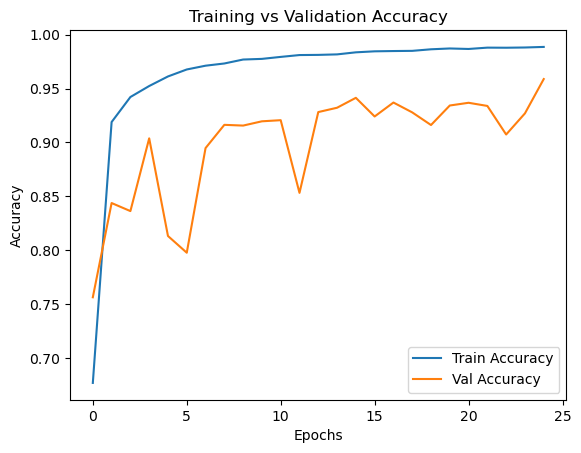

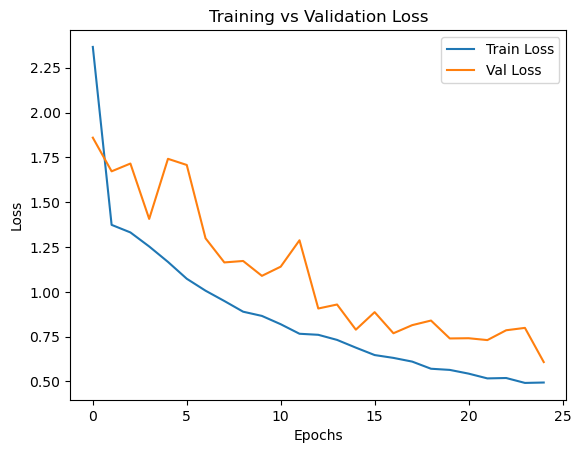

In [59]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [60]:
TEST_DIR = r"C:\Users\Krish\Desktop\BU\Sign Language Recoginastion\Dataset\asl_alphabet_test\test"
print(os.listdir(TEST_DIR)[:10])

['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I']


Found 8613 images belonging to 29 classes.


c:\Users\Krish\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


270/270 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step


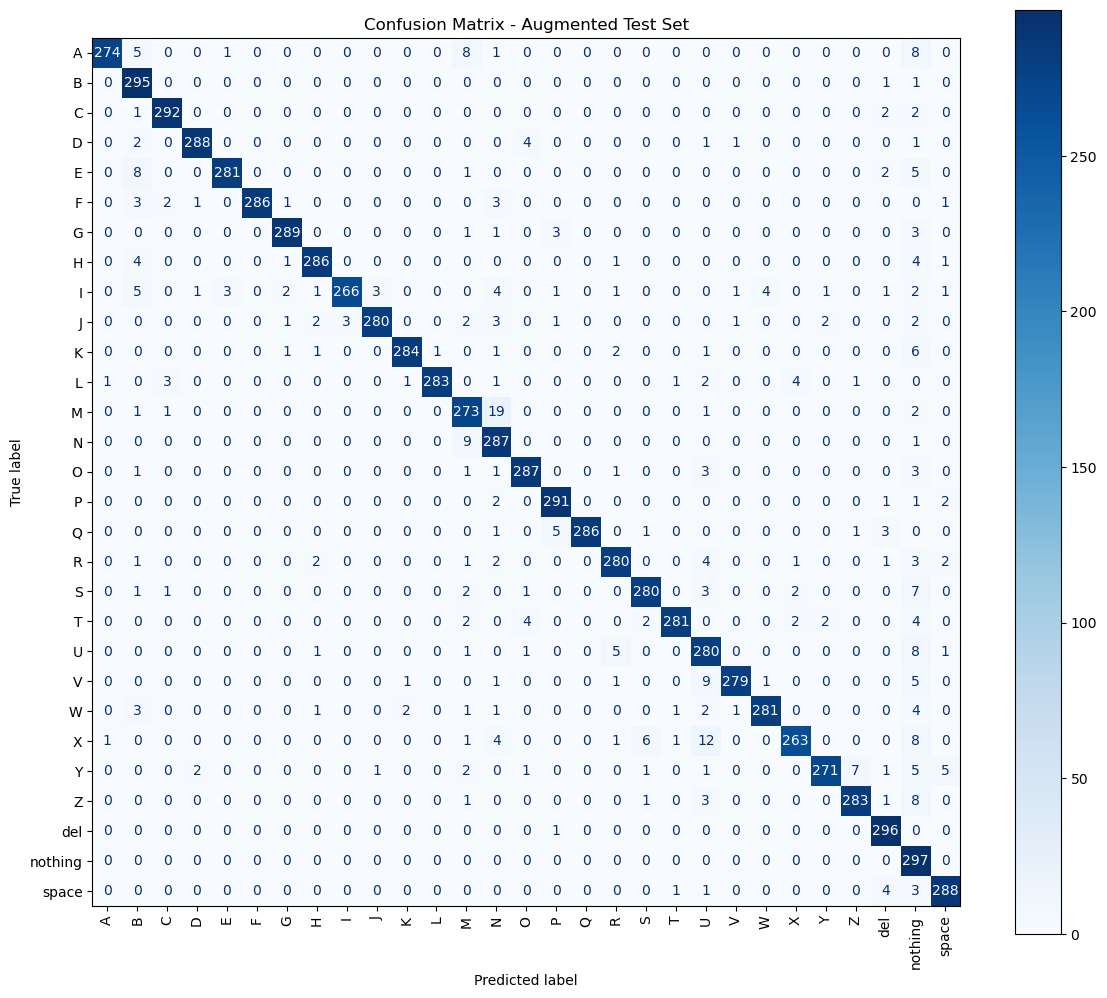

Test Accuracy (Augmented): 95.29%


In [63]:
test_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.7, 1.3]
)

test_gen = test_aug.flow_from_directory(
    TEST_DIR,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)
y_pred_probs = model.predict(test_gen, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(test_gen.classes, y_pred)
class_labels = list(test_gen.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(14, 12))
disp.plot(cmap="Blues", xticks_rotation=90, ax=ax)
plt.title("Confusion Matrix - Augmented Test Set")
plt.show()

acc = accuracy_score(test_gen.classes, y_pred)
print(f"Test Accuracy (Augmented): {acc*100:.2f}%")


In [64]:
pred_history = deque(maxlen=10)

cap = cv2.VideoCapture(0)
print("Starting webcam. Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.flip(frame, 1)

    x1, y1, x2, y2 = 100, 100, 300, 300
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
    roi = frame[y1:y2, x1:x2]

    roi = cv2.resize(roi, (64, 64))
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = roi.astype("float32")/255.0
    roi = np.expand_dims(roi, axis=0)

    pred = model.predict(roi, verbose=0)[0]
    pred_history.append(pred)
    avg_pred = np.mean(pred_history, axis=0)

    class_id = np.argmax(avg_pred)
    class_name = labels[class_id]
    confidence = avg_pred[class_id] * 100

    text = f"{class_name}: {confidence:.2f}%"
    cv2.putText(frame, text, (50, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)

    cv2.imshow("ASL Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Starting webcam. Press 'q' to quit.
